# WeatherPy
----

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + api_key
countries=[]
lats=[]
lons=[]
dates=[]
maxtemps=[]
winds=[]
clouds=[]
cities2=[]
humidities=[]
c=0
for city in cities:
   print(f'trying city {city}, number {c}')
   c=c+1 
   try:
       
       city_weather = url+'&q='+city
       
       data=requests.get(city_weather).json()
      
       country=data['city']['country']
       lat=data['city']['coord']['lat']
       lon=data['city']['coord']['lon']
       for date_dict in data['list']:
           cities2.append(city)
           date=date_dict['dt_txt']
           maxtemp=date_dict['main']['temp_max']
           humidity=date_dict['main']['humidity']
           wind=date_dict['wind']['speed']
           cloudiness=date_dict['clouds']["all"]
           countries.append(country)
           lats.append(lat)
           lons.append(lon)
           dates.append(date)
           maxtemps.append(maxtemp)
           humidities.append(humidity)
           winds.append(wind)
           clouds.append(cloudiness)
   except:
       continue

trying city ushuaia, number 0
trying city mataura, number 1
trying city kahului, number 2
trying city copiapo, number 3
trying city cayenne, number 4
trying city torbay, number 5
trying city bambous virieux, number 6
trying city bairiki, number 7
trying city rikitea, number 8
trying city hobart, number 9
trying city severo-kurilsk, number 10
trying city leningradskiy, number 11
trying city bluff, number 12
trying city qaanaaq, number 13
trying city chokurdakh, number 14
trying city madarounfa, number 15
trying city richards bay, number 16
trying city khatanga, number 17
trying city atuona, number 18
trying city punta arenas, number 19
trying city castro, number 20
trying city maxixe, number 21
trying city arraial do cabo, number 22
trying city butaritari, number 23
trying city filadelfia, number 24
trying city cape town, number 25
trying city qui nhon, number 26
trying city laguna, number 27
trying city kloulklubed, number 28
trying city saint-philippe, number 29
trying city morondava,

In [9]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1574262000,
   'main': {'temp': 297.56,
    'temp_min': 297.56,
    'temp_max': 297.56,
    'pressure': 1008,
    'sea_level': 1008,
    'grnd_level': 975,
    'humidity': 84,
    'temp_kf': 0},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10n'}],
   'clouds': {'all': 100},
   'wind': {'speed': 1.94, 'deg': 86},
   'rain': {'3h': 0.38},
   'sys': {'pod': 'n'},
   'dt_txt': '2019-11-20 15:00:00'},
  {'dt': 1574272800,
   'main': {'temp': 297.15,
    'temp_min': 297.15,
    'temp_max': 297.15,
    'pressure': 1007,
    'sea_level': 1007,
    'grnd_level': 974,
    'humidity': 85,
    'temp_kf': 0},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10n'}],
   'clouds': {'all': 100},
   'wind': {'speed': 2.69, 'deg': 79},
   'rain': {'3h': 2.31},
   'sys': {'pod': 'n'},
   'dt_txt': '2019-11-20 18:00:00'},
  {'dt': 1574283600,
   'main'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
df=pd.DataFrame({'Cities':cities2, 'Countries':countries,'Dates':dates,'Cloudiness':clouds,'MaxTemp': maxtemps,'Wind':winds,'Lat':lats,'Lon':lons, 'Humidity':humidities})
df

,Cities,Countries,Dates,Cloudiness,MaxTemp,Wind,Lat,Lon,Humidity
0,ushuaia,AR,2019-11-20 15:00:00,76,281.85,3.49,-54.807,-68.3074,77
1,ushuaia,AR,2019-11-20 18:00:00,80,279.95,2.85,-54.807,-68.3074,87
2,ushuaia,AR,2019-11-20 21:00:00,88,277.79,2.11,-54.807,-68.3074,93
3,ushuaia,AR,2019-11-21 00:00:00,94,275.64,1.68,-54.807,-68.3074,98
4,ushuaia,AR,2019-11-21 03:00:00,98,272.50,1.85,-54.807,-68.3074,99
...,...,...,...,...,...,...,...,...,...
21395,palauig,PH,2019-11-25 00:00:00,93,299.38,1.44,15.435,119.9045,65
21396,palauig,PH,2019-11-25 03:00:00,50,302.04,0.92,15.435,119.9045,57
21397,palauig,PH,2019-11-25 06:00:00,36,302.43,1.74,15.435,119.9045,60
21398,palauig,PH,2019-11-25 09:00:00,69,299.39,0.82,15.435,119.9045,76


In [18]:
data_drop = df.drop_duplicates(subset ="Cities", 
                     keep = 'first', inplace = False).reset_index(drop=True) 

data_drop

,Cities,Countries,Dates,Cloudiness,MaxTemp,Wind,Lat,Lon,Humidity
0,ushuaia,AR,2019-11-20 15:00:00,76,281.85,3.49,-54.8070,-68.3074,77
1,mataura,NZ,2019-11-20 15:00:00,95,282.00,3.98,-46.1928,168.8643,75
2,kahului,US,2019-11-20 15:00:00,0,297.68,6.85,20.8894,-156.4728,80
3,copiapo,CL,2019-11-20 15:00:00,0,298.51,3.56,-27.3667,-70.3334,32
4,cayenne,GF,2019-11-20 15:00:00,8,305.00,3.61,4.9371,-52.3259,57
...,...,...,...,...,...,...,...,...,...
530,daru,PG,2019-11-20 15:00:00,99,297.93,2.44,-9.0700,143.2100,91
531,kommunisticheskiy,RU,2019-11-20 15:00:00,89,258.02,3.96,61.6789,64.4834,81
532,stepnyak,KZ,2019-11-20 15:00:00,100,251.87,4.86,52.8313,70.7869,95
533,aksarayskiy,RU,2019-11-20 15:00:00,0,270.89,8.24,46.7924,48.0119,37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

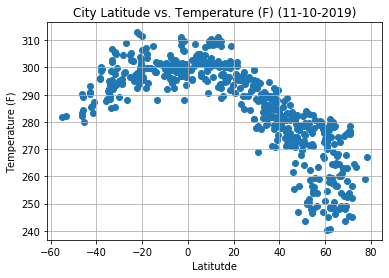

In [19]:
plt.scatter(data_drop["Lat"], data_drop["MaxTemp"], marker="o")


plt.title("City Latitude vs. Temperature (F) (11-10-2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("LatitudevsTemperature.png")

plt.show()

#### Latitude vs. Humidity Plot

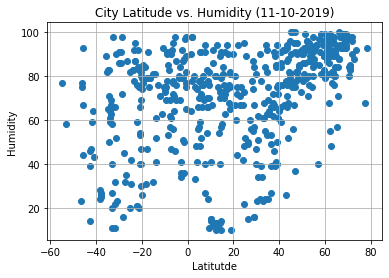

In [20]:
plt.scatter(data_drop["Lat"], data_drop["Humidity"], marker="o")


plt.title("City Latitude vs. Humidity (11-10-2019)")
plt.ylabel("Humidity")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("images/LatitudevsHumidity.png")


plt.show()

#### Latitude vs. Cloudiness Plot

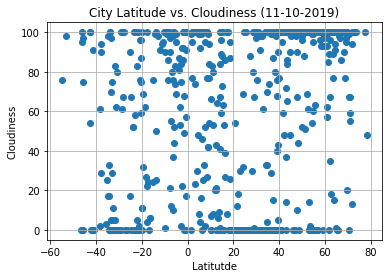

In [21]:
plt.scatter(data_drop["Lat"], data_drop["Cloudiness"], marker="o")


plt.title("City Latitude vs. Cloudiness (11-10-2019)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("images/LatitudevsCloudiness.png")


plt.show()

#### Latitude vs. Wind Speed Plot

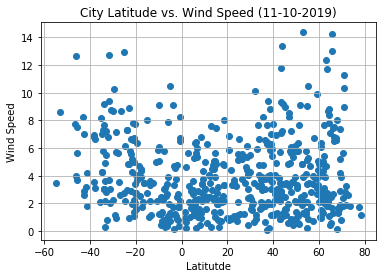

In [22]:
plt.scatter(data_drop["Lat"], data_drop["Wind"], marker="o")


plt.title("City Latitude vs. Wind Speed (11-10-2019)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitutde")
plt.grid(True)


plt.savefig("images/LatitudevsWindSpeed.png")

plt.show()